# YJN2: arch rib

Saang Bum Kim <br>
2020-07-01 17:50

In [ ]:
function [model,sb] = cfd_200915(varargin)
%
% [model,sb] = rib_200915(varargin)
%
% Model exported on Sep 16 2020, 18:03 by COMSOL 5.5.0.359.

In [1]:
% !comsol mphserver -silent &

[1] 21693



In [1]:
%
%%  PART 0.     Opening
%
% fclose all; close all
% clc
% clear all
tcomp = tic;
telap = toc(tcomp);

s_dir = 'git/openfoam_seo/wtt/yjn2/rib/';

p_comsol = 2036;
seo_init

id_f = 1;
% id_sv = true;
id_sv = false;
% id_pl = true;
id_pl = false;


MATLAB is now connected to a COMSOL Multiphysics Server at localhost:2036

Run the commands below to access the COMSOL ModelUtil commands:
import com.comsol.model.util.*


# Pre

In [39]:
sb.geo


ans = 

  struct with fields:

     x_c: 157.1274
       B: 1.3396
     y_c: -10.0502
      B1: 1.3396
       D: 2.7324
      id: 2
      B0: 12.3541
    x_c1: 162.2902



In [2]:
clear res
res.Re_pool = [150 1000 10000 100000 200000];
res.geo(1).s_geo = 'upper';
res.geo(2).s_geo = 'lower';

# Upper

In [37]:
sb.res(8).C.DLM
sb.res(9).C.DLM
sb.res(10).C.DLM


ans =

    1.0153   -0.2428   -0.4967    1.0182   -0.2427   -0.4945
    1.4088   -0.2516   -0.0151    1.4098   -0.2509   -0.0148
   -0.3934    0.0088    0.0105   -0.3916    0.0082    0.0100


ans =

    1.0560   -0.2527   -0.4895    1.0567   -0.2527   -0.4888
    1.4375   -0.2559   -0.0144    1.4379   -0.2557   -0.0144
   -0.3815    0.0032    0.0147   -0.3812    0.0030    0.0145


ans =

    1.0628   -0.2533   -0.4881    1.0630   -0.2533   -0.4876
    1.4436   -0.2562   -0.0140    1.4437   -0.2561   -0.0139
   -0.3808    0.0029    0.0155   -0.3807    0.0028    0.0154



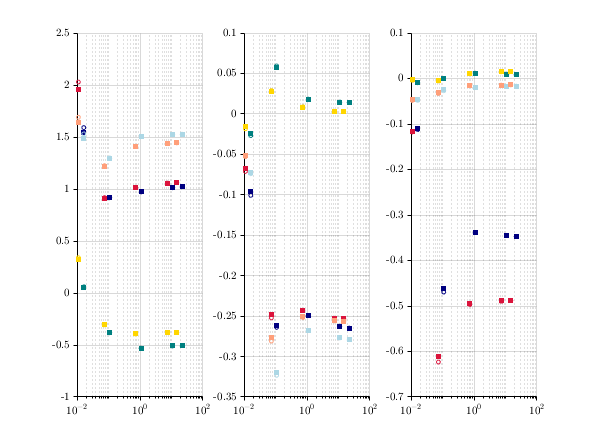

In [17]:
id_geo = 1;
% res.geo(id_geo).al_p = [0 2.5 -2.5 5.0 -5.0];
% res.geo(id_geo).s_al = {'000', 'm25', 'p25', 'm50', 'p50'};

% res.geo(id_geo).s_c{5} = rgb('Magenta');
% res.geo(id_geo).s_c{3} = rgb('Crimson');
% res.geo(id_geo).s_c{1} = rgb('Yellow');
% res.geo(id_geo).s_c{2} = rgb('Teal');
% res.geo(id_geo).s_c{4} = rgb('Indigo');

res.s_c{1} = rgb('Navy');
res.s_c{2} = rgb('Crimson');

res.s_c{3} = rgb('LightBlue');
res.s_c{4} = rgb('LightSalmon');

res.s_c{5} = rgb('Teal');
res.s_c{6} = rgb('Gold');


id_pause = true;
figure(1)
clf

for id_geo = 1:2
% for ll = [5 3 1 2 4]
for ll = 1
for ii = 1:5
    res.geo(id_geo).sb(ll).Re(ii) = res.Re_pool(ii);
    load(sprintf('rib_%s_turbulent_SST_Re%d', ...
        res.geo(id_geo).s_geo, res.Re_pool(ii)));

res.geo(id_geo).sb(ll).BD(ii,1:2) = [sb.B,sb.D];
% res.geo(id_geo).sb(ll).res(ii,1:6) = sb.res(ii).C.DLM(1:6);
% sc = [1 sb.D/sb.B (sb.D/sb.B)^2];
sc = [1 1 1];

for kk=1:3

res.geo(id_geo).sb(kk).res(ii,1:6) = sb.res(ii+5).C.DLM(kk,1:6)*diag([sc sc]);

    for jj=1:3
        subplot(1,3,jj)
        semilogx(sb.U(res.geo(id_geo).sb(ll).Re(ii)), ...
            res.geo(id_geo).sb(kk).res(ii,jj), ...
            'o', 'Color',res.s_c{id_geo+(kk-1)*2}, 'MarkerSize', 6-3)
            % 'Color',rgb('Navy'), 'MarkerSize', res.geo(id_geo).sb(.s_mk{2})
    end
    if id_pause
        gcfG;gcfH;gcfLFont;gcfS;%gcfP
        id_pause = false;
    end
    for jj=1:3
        subplot(1,3,jj)
        h = semilogx(sb.U(res.geo(id_geo).sb(ll).Re(ii)), ...
            res.geo(id_geo).sb(kk).res(ii,jj+3), ...
            's', 'Color',res.s_c{id_geo+(kk-1)*2}, 'MarkerSize', 6-2);
        h.MarkerFaceColor = h.Color;
    end
end

end
end
end

# C_DLM


C_DLM1 =

    1.0221   -0.2648   -0.3467
    1.5264   -0.2789   -0.0166
   -0.5043    0.0141    0.0089



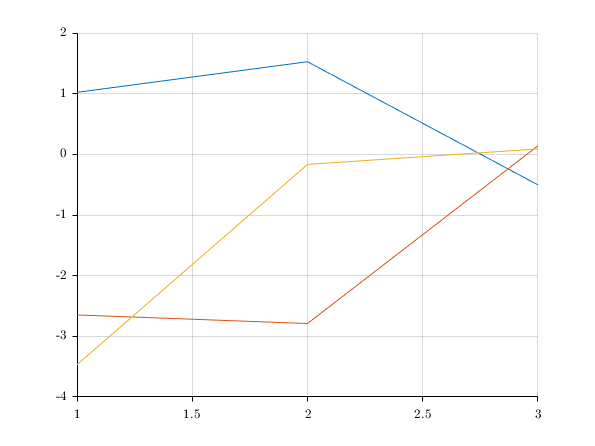

In [30]:
% [res.geo(1).sb(3).res(5,4:6)
C_DLM1 = ...
[res.geo(1).sb(1).res(5,4:6)
res.geo(1).sb(2).res(5,4:6)
res.geo(1).sb(3).res(5,4:6)
]%*diag([1 sb.D/sb.B sb.D^2/sb.B^2]) ...
% res.geo(1).sb(2).res(5,4:6)]%*diag([1 sb.D/sb.B sb.D^2/sb.B^2])
plot(C_DLM1*diag([1 10 10]))
gcfG;gcfH;gcfLFont;gcfS;%gcfP


C_DLM2 =

    1.0630   -0.2533   -0.4876
    1.4437   -0.2561   -0.0139
   -0.3807    0.0028    0.0154



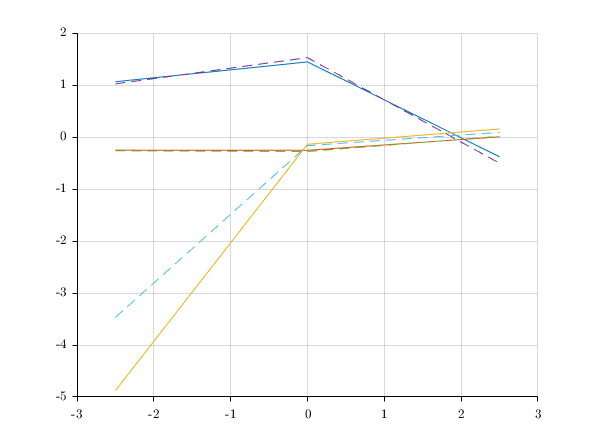

In [32]:
C_DLM2 = ...
[res.geo(2).sb(1).res(5,4:6)
res.geo(2).sb(2).res(5,4:6)
res.geo(2).sb(3).res(5,4:6)]%*diag([1 sb.D/sb.B sb.D^2/sb.B^2])
plot([-2.5 0 2.5],C_DLM2*diag([1 1 10]))
gcfG;gcfH;gcfLFont;gcfS;%gcfP
plot([-2.5:2.5:2.5], C_DLM1*diag([1 1 10]),'--')

# FINE